<a href="https://colab.research.google.com/github/vinayak2019/gromacs_automation/blob/main/Classical_MD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install

In [ ]:
!pip install udocker
!udocker --allow-root install

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.6/119.6 kB 6.7 MB/s eta 0:00:00
Info: creating repo: /root/.udocker
Info: udocker command line interface 1.3.17
Info: searching for udockertools >= 1.2.11
Info: installing udockertools 1.2.11
Info: installation of udockertools successful


In [ ]:
!udocker --allow-root pull gromacs/gromacs

Info: downloading layer sha256:a7dd2a7d55a6d0b0247feb33f13a79af1c31f6ade0c0204af1e1fd08cccf11a6
Info: downloading layer sha256:41c16b197d4a1c261b75bb089a1ecd28a6292f1f273c8f57c626517d55eccc91
Info: downloading layer sha256:f15d64a4fce19993400702910109dd517332acf8b3d0344ffe7ff10153de92d8
Info: downloading layer sha256:13ceb30627683b751c9df2eaf0b769d40278ac5b34aa42fd245090732bc3672f
Info: downloading layer sha256:9db041646481d6e899d61ddbe99738b449d95482fcac7baca6de5260799c1670
Info: downloading layer sha256:67b8bd5f43899b944e1e59c27a3539b2da4099dc3fb34df6aa3411e9e7b3fa2e
Info: downloading layer sha256:9fa1c8e0bd3547e398cca5365386e98a6360e1313304dcd23e91bc8b31d69116
Info: downloading layer sha256:4bccb324dc6a56fadd8afaa550117c5829631a682af3705653c9214ea2effb2f
Info: downloading layer sha256:e78dc9fff0e1b349b466b557682f9032494c2499528d3cba2a4583f1cdce5165
Info: downloading layer sha256:fe009cb884d8a7b1e5357023b002e5f811f914a68b79c52a2d577ffa9d6e02ba
Info: downloading layer sha256:967a17e9c

In [ ]:
!udocker --allow-root create --name=gromacs gromacs/gromacs

d83f9553-1d5f-3c62-bbeb-7e3bce383a62


In [ ]:
!udocker --allow-root run gromacs gmx help commands

 
 ****************************************************************************** 
 *                                                                            * 
 *               STARTING d83f9553-1d5f-3c62-bbeb-7e3bce383a62                * 
 *                                                                            * 
 ****************************************************************************** 
 executing: gmx
                       :-) GROMACS - gmx help, 2022.2 (-:

Executable:   /gromacs/bin.AVX2_256/gmx_mpi
Data prefix:  /gromacs
Working dir:  /root
Command line:
  gmx_mpi help commands

LIST OF AVAILABLE COMMANDS

Usage: gmx [<options>] <command> [<args>]

Available commands:
    anaeig               Analyze eigenvectors/normal modes
    analyze              Analyze data sets
    angle                Calculate distributions and correlations for angles
                         and dihedrals
    awh                  Extract data from an accelerated weight histogram
        

## Getting the PDB

In [ ]:
# prompt: write a code to pull 1ubq.pdb and save it as input.pdb

!wget https://files.rcsb.org/download/1UBQ.pdb -O input.pdb

--2025-02-04 10:49:35--  https://files.rcsb.org/download/1UBQ.pdb
Resolving files.rcsb.org (files.rcsb.org)... 128.6.159.157
Connecting to files.rcsb.org (files.rcsb.org)|128.6.159.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘input.pdb’

input.pdb               [ <=>                ]  76.73K  --.-KB/s    in 0.02s   

2025-02-04 10:49:35 (3.12 MB/s) - ‘input.pdb’ saved [78570]



In [ ]:
# prompt: Write a code to visualize the input.pdb. allow user to select the representation interactively

!pip install py3Dmol

import py3Dmol

view = py3Dmol.view(query='pdb:1UBQ')
view.setStyle({'cartoon':{'color':'spectrum'}})
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Preparing the System


### Converting to GROMACS input

### Generating the force field

In [ ]:
#The following lines use pdb2gmx to generate the topology
!udocker --allow-root run --volume=/content:/content gromacs gmx pdb2gmx -f /content/input.pdb -o /content/processed.gro -water tip3p -p /content/topol.top

 
 ****************************************************************************** 
 *                                                                            * 
 *               STARTING d83f9553-1d5f-3c62-bbeb-7e3bce383a62                * 
 *                                                                            * 
 ****************************************************************************** 
 executing: gmx
                     :-) GROMACS - gmx pdb2gmx, 2022.2 (-:

Executable:   /gromacs/bin.AVX2_256/gmx_mpi
Data prefix:  /gromacs
Working dir:  /root
Command line:
  gmx_mpi pdb2gmx -f /content/input.pdb -o /content/processed.gro -water tip3p -p /content/topol.top

Select the Force Field:

From '/gromacs/share/gromacs/top':

 1: AMBER03 protein, nucleic AMBER94 (Duan et al., J. Comp. Chem. 24, 1999-2012, 2003)

 2: AMBER94 force field (Cornell et al., JACS 117, 5179-5197, 1995)

 3: AMBER96 protein, nucleic AMBER94 (Kollman et al., Acc. Chem. Res. 29, 461-469, 1996)

 4: AM

### Creating the simulation box

In [ ]:
# Edit the processed.gro file to add a cubic box
!udocker --allow-root run --volume=/content:/content gromacs gmx editconf -f /content/processed.gro -o /content/processed_boxed.gro -c -d 1.0 -bt cubic

 
 ****************************************************************************** 
 *                                                                            * 
 *               STARTING d83f9553-1d5f-3c62-bbeb-7e3bce383a62                * 
 *                                                                            * 
 ****************************************************************************** 
 executing: gmx
                     :-) GROMACS - gmx editconf, 2022.2 (-:

Executable:   /gromacs/bin.AVX2_256/gmx_mpi
Data prefix:  /gromacs
Working dir:  /root
Command line:
  gmx_mpi editconf -f /content/processed.gro -o /content/processed_boxed.gro -c -d 1.0 -bt cubic

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 1405 atoms
Volume: 62.9497 nm^3, corresponds to roughly 28300 electrons
No velocities found
    system size :  3.168  3.487  3.857 (nm)
    diameter    :  4.491               (nm)
    center      :  3.025  2.891  1.503

### Filling the box with water


In [ ]:
!udocker --allow-root run --volume=/content:/content gromacs gmx solvate -cp /content/processed_boxed.gro -cs spc216.gro -o /content/solvated.gro -p /content/topol.top

 
 ****************************************************************************** 
 *                                                                            * 
 *               STARTING d83f9553-1d5f-3c62-bbeb-7e3bce383a62                * 
 *                                                                            * 
 ****************************************************************************** 
 executing: gmx
                     :-) GROMACS - gmx solvate, 2022.2 (-:

Executable:   /gromacs/bin.AVX2_256/gmx_mpi
Data prefix:  /gromacs
Working dir:  /root
Command line:
  gmx_mpi solvate -cp /content/processed_boxed.gro -cs spc216.gro -o /content/solvated.gro -p /content/topol.top

Reading solute configuration
Reading solvent configuration

Initialising inter-atomic distances...

         based on residue and atom names, since they could not be
         definitively assigned from the information in your input
         files. These guessed numbers might deviate from the mass
    

### Adding ions

In [ ]:
!wget http://www.mdtutorials.com/gmx/lysozyme/Files/ions.mdp

In [ ]:
# Edit the processed.gro file to add ions
!udocker --allow-root run --volume=/content:/content gromacs gmx grompp -f /content/ions.mdp -c /content/solvated.gro -p /content/topol.top -o /content/ions.tpr
!udocker --allow-root run --volume=/content:/content gromacs gmx genion -s /content/ions.tpr -o /content/solvated_ions.gro -p /content/topol.top -conc 0.15 -pname NA -nname CL -neutral

 
 ****************************************************************************** 
 *                                                                            * 
 *               STARTING d83f9553-1d5f-3c62-bbeb-7e3bce383a62                * 
 *                                                                            * 
 ****************************************************************************** 
 executing: gmx
                      :-) GROMACS - gmx grompp, 2022.2 (-:

Executable:   /gromacs/bin.AVX2_256/gmx_mpi
Data prefix:  /gromacs
Working dir:  /root
Command line:
  gmx_mpi grompp -f /content/ions.mdp -c /content/solvated.gro -p /content/topol.top -o /content/ions.tpr


NOTE 1 [file /content/ions.mdp]:
  For a correct single-point energy evaluation with nsteps = 0, use
  continuation = yes to avoid constraining the input coordinates.

Setting the LD random seed to 2147335163

Generated 2145 of the 2145 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 

## Energy minimization

In [ ]:
# get the parameters for minimization
!wget http://www.mdtutorials.com/gmx/lysozyme/Files/minim.mdp

In [ ]:
# Energy minimisation
!udocker --allow-root run --volume=/content:/content gromacs gmx grompp -f /content/minim.mdp -c /content/solvated_ions.gro -p /content/topol.top -o /content/em.tpr
!udocker --allow-root run --volume=/content:/content gromacs gmx mdrun -v -deffnm /content/em

 
 ****************************************************************************** 
 *                                                                            * 
 *               STARTING d83f9553-1d5f-3c62-bbeb-7e3bce383a62                * 
 *                                                                            * 
 ****************************************************************************** 
 executing: gmx
                      :-) GROMACS - gmx grompp, 2022.2 (-:

Executable:   /gromacs/bin.AVX2_256/gmx_mpi
Data prefix:  /gromacs
Working dir:  /root
Command line:
  gmx_mpi grompp -f /content/emin.mdp -c /content/solvated_ions.gro -p /content/topol.top -o /content/em.tpr

Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file /content/emin.mdp]:
  With Verlet lists the optimal nstlist is >= 10, with GPUs >= 20. Note
  that with the Verlet scheme, nstlist has no effect on the accuracy of
  your simulation.

Setting the LD random seed to 801079291

Generated 2145 of the 2145 no

In [ ]:
# Checking for minimization
!udocker --allow-root run --volume=/content:/content gromacs gmx energy -f /content/em.edr -o /content/potential.xvg -xvg none

 
 ****************************************************************************** 
 *                                                                            * 
 *               STARTING d83f9553-1d5f-3c62-bbeb-7e3bce383a62                * 
 *                                                                            * 
 ****************************************************************************** 
 executing: gmx
                      :-) GROMACS - gmx energy, 2022.2 (-:

Executable:   /gromacs/bin.AVX2_256/gmx_mpi
Data prefix:  /gromacs
Working dir:  /root
Command line:
  gmx_mpi energy -f /content/em.edr -o /content/potential.xvg -xvg none

Opened /content/em.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond                                 2  Angl

<Axes: xlabel='step'>

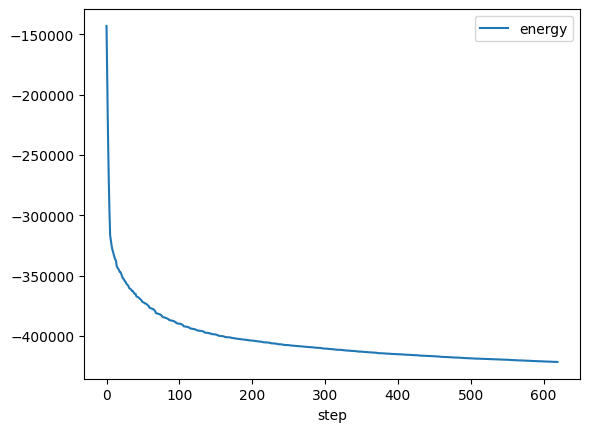

In [ ]:
# plotting minimization
import pandas as pd
df = pd.read_csv('potential.xvg', sep='\\s+', header=None, names=['step','energy'])
df.plot('step')

# Equilibration run - temperature

In [ ]:
# get the settings for the run
!wget http://www.mdtutorials.com/gmx/lysozyme/Files/nvt.mdp

--2025-02-04 11:58:55--  http://www.mdtutorials.com/gmx/lysozyme/Files/nvt.mdp
Resolving www.mdtutorials.com (www.mdtutorials.com)... 13.59.3.21
Connecting to www.mdtutorials.com (www.mdtutorials.com)|13.59.3.21|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2369 (2.3K)
Saving to: ‘nvt.mdp.1’

nvt.mdp.1           100%[===================>]   2.31K  --.-KB/s    in 0s      

2025-02-04 11:58:55 (301 MB/s) - ‘nvt.mdp.1’ saved [2369/2369]



In [ ]:
!udocker --allow-root run --volume=/content:/content gromacs gmx grompp -f /content/nvt.mdp -c /content/em.gro -r /content/em.gro -p /content/topol.top -o /content/nvt.tpr
!udocker --allow-root run --volume=/content:/content gromacs gmx mdrun -v -deffnm /content/nvt

 
 ****************************************************************************** 
 *                                                                            * 
 *               STARTING d83f9553-1d5f-3c62-bbeb-7e3bce383a62                * 
 *                                                                            * 
 ****************************************************************************** 
 executing: gmx
                      :-) GROMACS - gmx grompp, 2022.2 (-:

Executable:   /gromacs/bin.AVX2_256/gmx_mpi
Data prefix:  /gromacs
Working dir:  /root
Command line:
  gmx_mpi grompp -f /content/nvt.mdp -c /content/em.gro -r /content/em.gro -p /content/topol.top -o /content/nvt.tpr

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to -637817873

Generated 2145 of the 2145 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 2145 of the 2145 1-4 parameter combinations

Excluding 3 bonded neigh